In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r '/content/drive/My Drive/VinaFood21' /content/

In [3]:
import os

BASE_DIR = '/content/VinaFood21'

print(f"\n{BASE_DIR}")

# Đường dẫn đến train/test
train_path = os.path.join(BASE_DIR, 'train')
test_path = os.path.join(BASE_DIR, 'test')

# Đếm số lượng lớp
num_train_classes = len([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
num_test_classes = len([d for d in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, d))])

print(f"Số lượng lớp trong Train: {num_train_classes}")
print(f"Số lượng lớp trong Test: {num_test_classes}")


/content/VinaFood21
Số lượng lớp trong Train: 21
Số lượng lớp trong Test: 21


EDA


Thống kê EDA:
Tổng số class: 21
Tổng số ảnh trong Train: 10045
Tổng số ảnh trong Test: 6682
Class có nhiều ảnh nhất trong Train: banh-hoi (910 ảnh)
Class có ít ảnh nhất trong Train: bap-nuong (215 ảnh)
Class có nhiều ảnh nhất trong Test: banh-hoi (607 ảnh)
Class có ít ảnh nhất trong Test: bap-nuong (143 ảnh)

Phân bố số lượng ảnh mỗi class:
               Class  Train_Count  Test_Count
0           banh-can          363         241
1           banh-hoi          910         607
2       banh-mi-chao          434         289
3           banh-tet          548         364
4    banh-trang-tron          465         309
5             banh-u          266         176
6           banh-uot          841         560
7          bap-nuong          215         143
8             bo-kho          509         338
9          bo-la-lot          689         458
10         bot-chien          415         276
11             ca-ri          258         171
12      canh-kho-qua          436         290
13     canh-

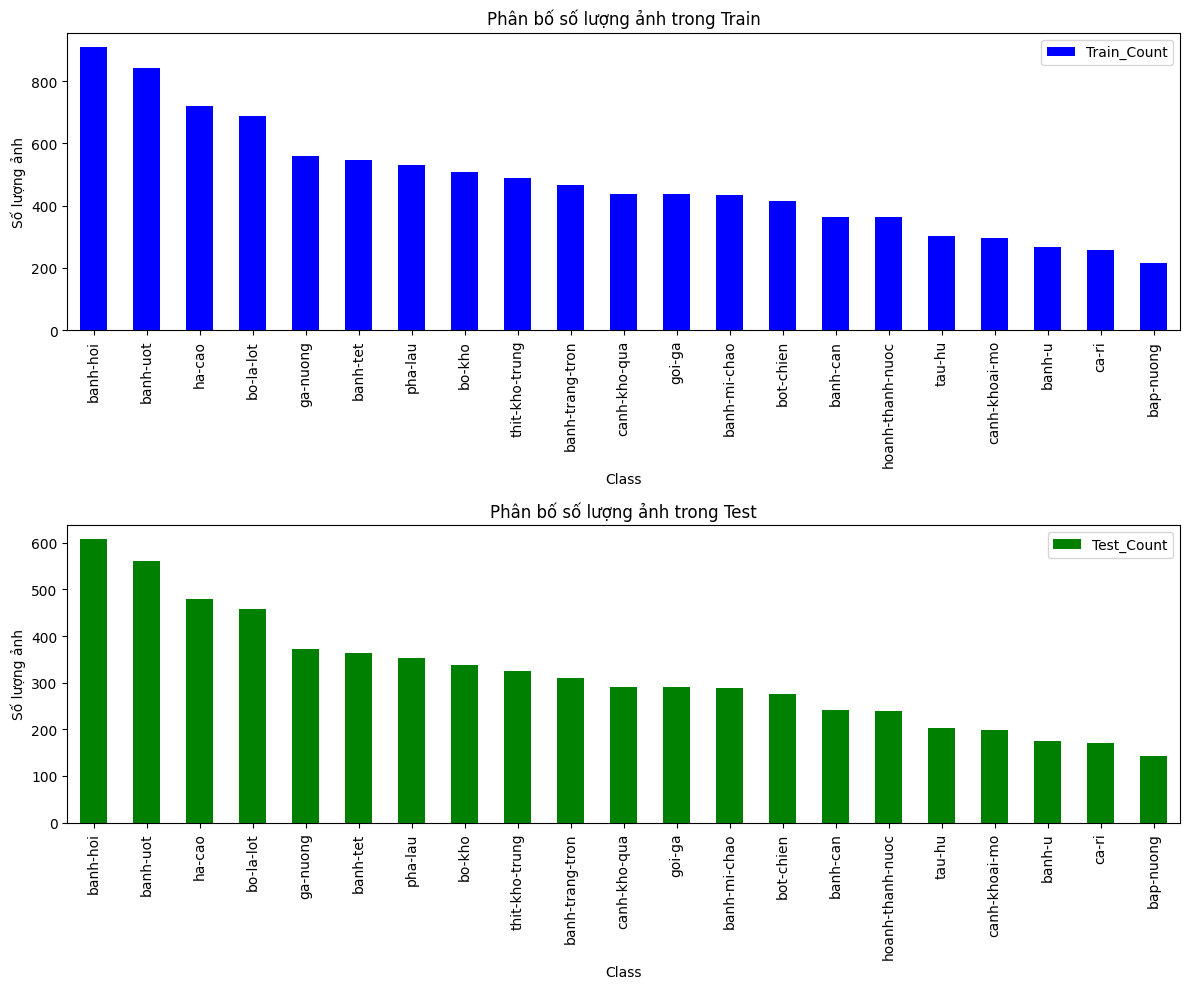

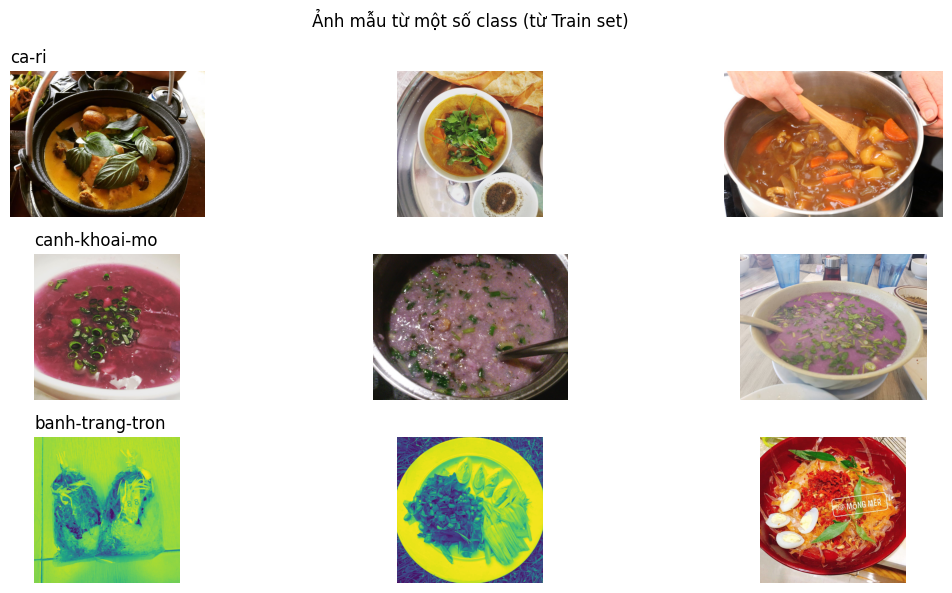

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Hàm đếm số ảnh trong từng class
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(images)
    return class_counts

# Đếm cho train và test
train_counts = count_images_per_class(train_path)
test_counts = count_images_per_class(test_path)

# Chuyển thành DataFrame
df_train = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train_Count']).sort_values('Train_Count', ascending=False)
df_test = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test_Count']).sort_values('Test_Count', ascending=False)
df_combined = df_train.merge(df_test, on='Class', how='outer').fillna(0)

# Thống kê cơ bản
print("\nThống kê EDA:")
print(f"Tổng số class: {len(df_combined)}")
print(f"Tổng số ảnh trong Train: {df_combined['Train_Count'].sum()}")
print(f"Tổng số ảnh trong Test: {df_combined['Test_Count'].sum()}")
print(f"Class có nhiều ảnh nhất trong Train: {df_train.iloc[0]['Class']} ({df_train.iloc[0]['Train_Count']} ảnh)")
print(f"Class có ít ảnh nhất trong Train: {df_train.iloc[-1]['Class']} ({df_train.iloc[-1]['Train_Count']} ảnh)")
print(f"Class có nhiều ảnh nhất trong Test: {df_test.iloc[0]['Class']} ({df_test.iloc[0]['Test_Count']} ảnh)")
print(f"Class có ít ảnh nhất trong Test: {df_test.iloc[-1]['Class']} ({df_test.iloc[-1]['Test_Count']} ảnh)")

# Bảng phân bố
print("\nPhân bố số lượng ảnh mỗi class:")
print(df_combined)

# Vẽ biểu đồ bar cho phân bố
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
df_combined.sort_values('Train_Count', ascending=False).plot(kind='bar', x='Class', y='Train_Count', ax=ax[0], color='blue')
ax[0].set_title('Phân bố số lượng ảnh trong Train')
ax[0].set_ylabel('Số lượng ảnh')
df_combined.sort_values('Test_Count', ascending=False).plot(kind='bar', x='Class', y='Test_Count', ax=ax[1], color='green')
ax[1].set_title('Phân bố số lượng ảnh trong Test')
ax[1].set_ylabel('Số lượng ảnh')
plt.tight_layout()
plt.show()

# Hiển thị một số ảnh mẫu
num_samples_per_class = 3
selected_classes = random.sample(list(train_counts.keys()), min(3, len(train_counts)))

fig, axes = plt.subplots(len(selected_classes), num_samples_per_class, figsize=(12, 6))
fig.suptitle('Ảnh mẫu từ một số class (từ Train set)')

for i, class_name in enumerate(selected_classes):
    class_dir = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    sample_images = random.sample(images, min(num_samples_per_class, len(images)))

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(class_name, loc='left')

plt.tight_layout()
plt.show()

###Bài 1

Số classes: 21


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10, Loss: 2.8364


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2/10, Loss: 2.6616


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3/10, Loss: 2.5602


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4/10, Loss: 2.4651


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5/10, Loss: 2.3889


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6/10, Loss: 2.3307


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7/10, Loss: 2.2720


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 8/10, Loss: 2.2218


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 9/10, Loss: 2.1645


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 10/10, Loss: 2.1026


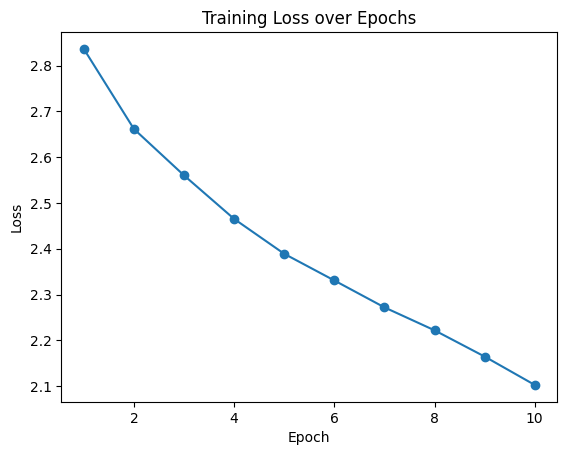


Kết quả đánh giá trên Test set:
Accuracy: 0.2505
Precision (macro): 0.2469
Recall (macro): 0.2266
F1-macro: 0.2187


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Transform cho dữ liệu
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Lambda(lambda img: img.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Định nghĩa mô hình LeNet
class LeNet(nn.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

num_classes = len(train_dataset.classes)
print(f'Số classes: {num_classes}')

# Khởi tạo model, loss, optimizer (Adam)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện model
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

# Vẽ biểu đồ loss huấn luyện
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Đánh giá trên test set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Tính metrics (macro cho multi-class)
accuracy = accuracy_score(all_labels, all_preds)
precision_macro = precision_score(all_labels, all_preds, average='macro')
recall_macro = recall_score(all_labels, all_preds, average='macro')
f1_macro = f1_score(all_labels, all_preds, average='macro')

# In kết quả
print('\nKết quả đánh giá trên Test set:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro): {recall_macro:.4f}')
print(f'F1-macro: {f1_macro:.4f}')